<a href="https://colab.research.google.com/github/devrenanferrari/devrenanferrari/blob/main/PortfolioRenanFerrari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PORTFÓLIO - ALGORITMOS E ESTRUTURA DE DADOS AVANÇADO


---

### **Autor:** Renan Ferrari

---


### **Funcionalidade:** Ordenar a listagem de produtos para otimizar a experiência do usuário.


---

### **Data:** 26/09/2024

---

### **Unidade & Aula:** U1_ FUNDAMENTOS DE ALGORITMOS, A4_ NOÇÕES DE ORDENAÇÃO.






Importa as bibliotecas necessárias para funcionamento do código

In [169]:
import random
import datetime
import names
import pandas as pd
import matplotlib.pyplot as plt

Definindo Classes

In [170]:
class Produto:
    def __init__(self, nome, preco, avaliacao, data_adicao, categoria):
        self.nome = nome
        self.preco = preco
        self.avaliacao = avaliacao
        self.data_adicao = data_adicao
        self.categoria = categoria

    def __repr__(self):
        return f"{self.nome}: {self.preco}, Avaliação: {self.avaliacao}, Categoria: {self.categoria}"


In [171]:
class Usuario:
    def __init__(self, nome, idade, sexo, comprou, categoria_compra=None, pesquisa=""):
        self.nome = nome
        self.idade = idade
        self.sexo = sexo
        self.comprou = comprou
        self.categoria_compra = categoria_compra
        self.pesquisa = pesquisa

    def __repr__(self):
        return (f"{self.nome}, Idade: {self.idade}, Sexo: {self.sexo}, "
                f"Comprou: {self.comprou}, Categoria: {self.categoria_compra}, "
                f"Pesquisa: {self.pesquisa}")


Funções para gerar os Produtos e os Usuários

In [172]:
def gerar_produtos(n):
    categorias = ["Livros", "Beleza", "Roupas", "Esportes", "Eletrônicos"]
    produtos = []

    for i in range(n):
        nome = f"Produto{i+1}"
        preco = round(random.uniform(10, 1000), 2)
        avaliacao = round(random.uniform(0, 5), 2)
        data_adicao = datetime.datetime.now() - datetime.timedelta(days=random.randint(0, 365))
        categoria = random.choice(categorias)
        produtos.append(Produto(nome, preco, avaliacao, data_adicao, categoria))

    return produtos


In [173]:
def gerar_usuarios(n):
    categorias = ["Livros", "Beleza", "Roupas", "Esportes", "Eletrônicos"]
    usuarios = []

    for _ in range(n):
        nome = names.get_full_name()
        idade = random.randint(18, 65)
        sexo = random.choice(['M', 'F'])
        comprou = random.choice([True, False])
        categoria_compra = random.choice(categorias) if comprou else None
        pesquisa = random.choice(categorias)
        usuarios.append(Usuario(nome, idade, sexo, comprou, categoria_compra, pesquisa))

    return usuarios


Função para recomendar produtos

In [174]:
def recomendar_produtos(usuario, produtos):
    produtos_recomendados = []

    if usuario.comprou and usuario.categoria_compra:
        produtos_recomendados += [produto for produto in produtos if produto.categoria == usuario.categoria_compra]

    if not usuario.comprou:
        produtos_recomendados += [produto for produto in produtos if produto.categoria == usuario.pesquisa]

    produtos_recomendados = list({produto.nome: produto for produto in produtos_recomendados}.values())

    produtos_recomendados = sorted(produtos_recomendados, key=lambda p: p.avaliacao, reverse=True)

    return produtos_recomendados[:5]


Salvando os Usuaários em um DataFrame

In [175]:
usuarios_data = {
    "Nome": [usuario.nome for usuario in usuarios],
    "Idade": [usuario.idade for usuario in usuarios],
    "Sexo": [usuario.sexo for usuario in usuarios],
    "Comprou": [usuario.comprou for usuario in usuarios],
    "Categoria": [usuario.categoria_compra for usuario in usuarios],
    "Pesquisa": [usuario.pesquisa for usuario in usuarios],
}

usuarios_df = pd.DataFrame(usuarios_data)


Gerando os dados

In [176]:
num_produtos = 50
num_usuarios = 10
produtos = gerar_produtos(num_produtos)
usuarios = gerar_usuarios(num_usuarios)

for usuario in usuarios:
    recomendacoes = recomendar_produtos(usuario, produtos)
    pass
    if recomendacoes:
        for produto in recomendacoes:
          pass
    else:
        print("  - Nenhuma recomendação.")


In [177]:
recomendacoes_data = []

for usuario in usuarios:
    recomendacoes = recomendar_produtos(usuario, produtos)

    for produto in recomendacoes:
        recomendacoes_data.append({
            "Usuário": usuario.nome,
            "Produto": produto.nome,
            "Preço": produto.preco,
            "Avaliação": produto.avaliacao,
            "Categoria": produto.categoria,
        })

recomendacoes_df = pd.DataFrame(recomendacoes_data)

In [178]:


print("\nUsuários:")
display(usuarios_df)

print("\nRecomendações de Produtos:")
display(recomendacoes_df)


Usuários:


,Nome,Idade,Sexo,Comprou,Categoria,Pesquisa
0,Jill Conn,49,M,False,None,Roupas
1,Sarina Villalta,43,F,False,None,Esportes
2,Tiffany Wells,26,M,False,None,Roupas
3,Eric Kelly,35,F,False,None,Livros
4,Steve Campanella,54,M,True,Beleza,Beleza
5,Marina Hapke,64,M,False,None,Roupas
6,Karina Perkins,27,F,False,None,Livros
7,Betty Calder,40,M,False,None,Eletrônicos
8,Linda Smith,53,M,True,Livros,Eletrônicos
9,Lisa Adams,44,M,False,None,Roupas



Recomendações de Produtos:


,Usuário,Produto,Preço,Avaliação,Categoria
0,Steven Stephen,Produto28,893.83,4.88,Livros
1,Steven Stephen,Produto25,663.61,4.63,Livros
2,Steven Stephen,Produto36,608.46,4.57,Livros
3,Steven Stephen,Produto40,580.55,3.21,Livros
4,Steven Stephen,Produto8,860.30,3.19,Livros
5,Margaret Thompson,Produto28,893.83,4.88,Livros
6,Margaret Thompson,Produto25,663.61,4.63,Livros
7,Margaret Thompson,Produto36,608.46,4.57,Livros
8,Margaret Thompson,Produto40,580.55,3.21,Livros
9,Margaret Thompson,Produto8,860.30,3.19,Livros


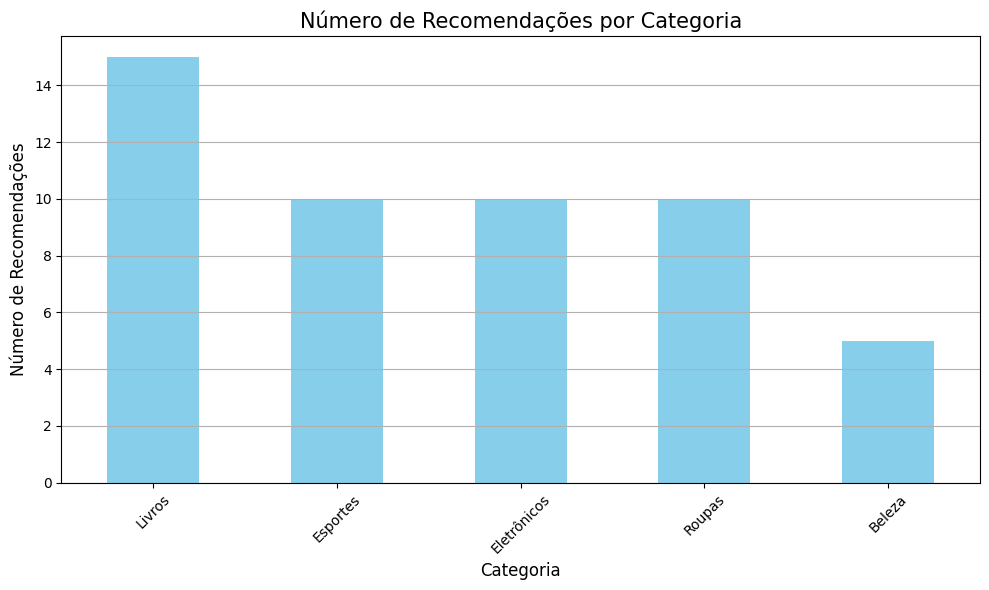

In [181]:
categoria_counts = recomendacoes_df['Categoria'].value_counts()

plt.figure(figsize=(10, 6))
categoria_counts.plot(kind='bar', color='skyblue')

plt.title('Número de Recomendações por Categoria', fontsize=15)
plt.xlabel('Categoria', fontsize=12)
plt.ylabel('Número de Recomendações', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')

# Exibir o gráfico
plt.tight_layout()
plt.show()
